# Importing Libraries:

In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from summarytools import dfSummary

# Displaying data:

In [6]:
df = pd.read_csv('credit_risk.csv')

In [7]:
df.sample(5).T

,11096,10664,14536,13388,14697
Id,11096,10664,14536,13388,14697
Age,26,25,26,24,26
Income,72000,37500,109500,90474,39996
Home,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT
Emp_length,10.0,1.0,11.0,8.0,10.0
Intent,EDUCATION,MEDICAL,VENTURE,EDUCATION,MEDICAL
Amount,16000,10000,20000,15000,15000
Rate,NaN,15.96,17.56,10.38,13.06
Status,0,0,0,0,1
Percent_income,0.22,0.27,0.18,0.17,0.38


# Data Stats:

In [8]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Id[int64],Mean (sd) : 16290.0 (9405.5)min < med < max:0.0 < 16290.0 < 32780.0IQR (CV) : 16290.0 (1.7),"32,581 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACCElEQVR4nO3YvY7aUBRF4X3Nj8yAbCE00NGkT+GSh8jD5iF4Aoo0qeiQkGWEZxDIcaqRpgnYmJBsaX21z723WEJHhLquBfzvon/9AKCJ/q0PQggjScM7z48k/bpztuu8692u75akc13X7x3m/+hqqCGE0Ww2+5YkybTtwVVVDcqy/DKZTH5GUXR55rzr3a7v/nA4HPIQwve/EeutX9RhkiTT1Wr1nqbpqc3B2+12utlsXrMs+7FYLPK2D+sy73q367slqSiKeL1eT/f7/VDS00OVJKVpeprP529tDs7zfCRJ4/G49WzXede7Xd/9yejOuZsahQo0UVXVQFISQrhn/Op+S6h4iLIsB5fL5etyuez1er1Wa6J0e78lVDzE+Xzux3H8kmXZqe2O22S/JVQ8VIcd9+p+yx/+sECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosECosNBv8lFRFHHbg4/HYyxJZVnGu93u5Znzrne7vrvrfJO+fgM5GUzWCFt/OgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age[int64],Mean (sd) : 27.7 (6.3)min < med < max:20.0 < 26.0 < 144.0IQR (CV) : 7.0 (4.4),58 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACB0lEQVR4nO3ZsW7aUBSH8XMLoReobBCt2VjZOjDyEH3YPIRX3gPJIFs4dozQ7dalaontWMk/+X4z5+Dhky37uhCCAe/dl7e+AOAlxvd+4Jybmtmk4/4mhFB1nAX++G+ozrnparX6FUXRssvyoijOzrlHYkVf9+6okyiKlvv9vorjuG6zOM9zn6bpMsuyiZkRKnq5++g3M4vjuE6S5KnD/mmHGeAvvExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwnjI5bfb7cHMIudc1xVNCKF6xUuCqMFCLcvy4Xq9/txsNqPRaFR32VEUxdk590isGCzUpmnG3vvZbrer1+v1ue18nuc+TdNllmUTMyPUT27QR7+Z2Xw+r5Mkeeo4Pn3Vi4EsXqYggVAhgVAhgVAhgVAhgVAhYfDPU330PNniVOsDebeh9j3Z4lTrY3lRqHme+7aLL5eLNzMry9Ifj8dZ2/nT6fTNez/bbrdusVg8t5mtqurr4XD4kWXZd+dc0fa/8SaeQwj/vCH9Biomf0WQscupAAAAAElFTkSuQmCC"">",0(0.0%)
3,Income[int64],Mean (sd) : 66074.8 (61983.1)min < med < max:4000.0 < 55000.0 < 6000000.0IQR (CV) : 40700.0 (1.1),"4,295 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
4,Home[object],1. RENT2. MORTGAGE3. OWN4. OTHER,"16,446 (50.5%)13,444 (41.3%)2,584 (7.9%)107 (0.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB7klEQVR4nO3bQWqjcBjG4c8iZbpRgpDD5BA97BzC24QQF9PSjbOYzr4a8or4PCf4J/wwUXybeZ4LEl62PgDHITZimqp6q6rXrQ+yQ1/zPH9sfYg9aYdheO+67rT1QfZmmqZb0zS/Bfdzbdd1p8vl8tH3/efWh9mL+/3+axzH0/V6fa0qsf1QW1XV9/3n+Xz+s/VhduZt6wPsjRsEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOmrfr3yszWB9kT39c67TRNt3EcT+WVmUWmabpV1dfW59gTr4Wv57XwhRpTPlLcIBDjZ9TPYczh11VWUjmHXldZSWVZV3nkE+MGgRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxh57yHfVzb+XwUz6TvBwbBBuEGFM+YtZc2VwJWGXxusoaibUWrauskXjEmnXVIe9aeZyHusSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIWbSuskbiEYvXVdZIrGWDQIx1FTH/r2zlasWztcMwvFdVWUzxbC9d152+p3xHXsUT4DkbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiGm/11JVFlM8m

# EDA: 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [10]:
df.corr()["Status"].sort_values(ascending=False)

C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\1680384807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Status"].sort_values(ascending=False)


Status            1.000000
Percent_income    0.379366
Rate              0.335133
Amount            0.105376
Cred_length      -0.015529
Age              -0.021629
Id               -0.060256
Emp_length       -0.082489
Income           -0.144449
Name: Status, dtype: float64

C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\933977039.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Status'].sort_values().plot(kind='bar')


<AxesSubplot:>

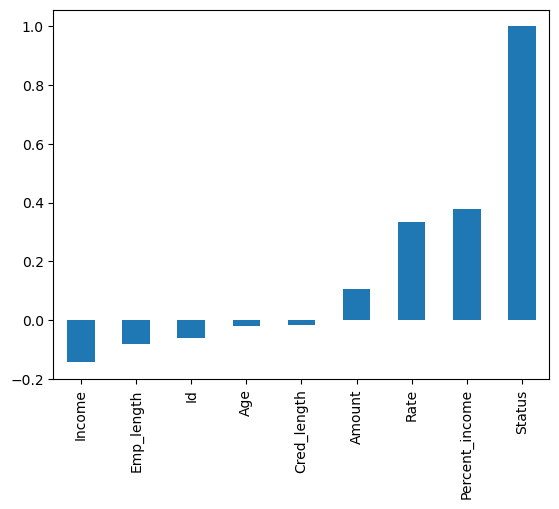

In [11]:
df.corr()['Status'].sort_values().plot(kind='bar')

In [12]:
df_copy = df.copy()
df_copy.Default = df.Default.apply(lambda x: 1 if x=='Y' else 0)

C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\645804505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()['Default'].sort_values().plot(kind='bar')


<AxesSubplot:>

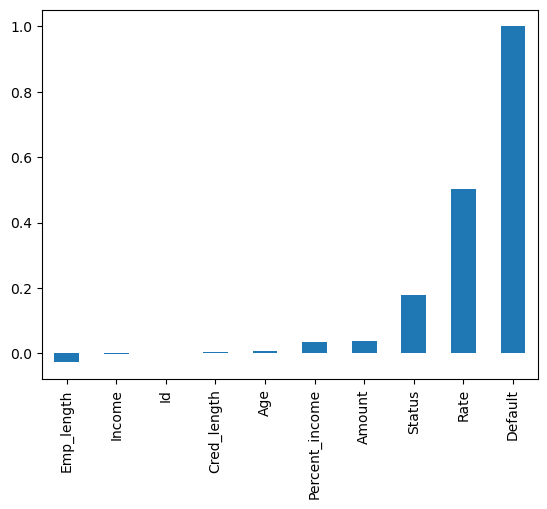

In [13]:
df_copy.corr()['Default'].sort_values().plot(kind='bar')

In [14]:
df['Amount'] = df['Amount'].astype('int64')

In [15]:
df['Rate'].fillna(df['Rate'].mean(), inplace=True)

In [16]:
df['Emp_length'].fillna(df['Emp_length'].mean(), inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      32581 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            32581 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [18]:
df[df.duplicated() == True].sum()

Id                0.0
Age               0.0
Income            0.0
Home              0.0
Emp_length        0.0
Intent            0.0
Amount            0.0
Rate              0.0
Status            0.0
Percent_income    0.0
Default           0.0
Cred_length       0.0
dtype: float64

## Removing unwanted columns:

In [19]:
df = df.drop('Id', axis=1)

In [20]:
df.sample(3).T

,10702,23927,20913
Age,24,30,27
Income,38700,67642,73004
Home,RENT,MORTGAGE,RENT
Emp_length,2.0,5.0,5.0
Intent,MEDICAL,PERSONAL,EDUCATION
Amount,10000,17000,9000
Rate,11.011695,11.58,9.63
Status,0,0,1
Percent_income,0.26,0.25,0.12
Default,N,N,N


### Status Vs Percent Income: 

In [21]:
pd.pivot_table(data=df, columns='Status', values='Percent_income', aggfunc='mean')

Status,0,1
Percent_income,0.148805,0.246889


### Mean Amount requested  as per the Home ownership status

In [22]:
pd.pivot_table(data=df, columns='Home', values='Amount', aggfunc='sum')

Home,MORTGAGE,OTHER,OWN,RENT
Amount,142163050,1184975,23333375,145749900


### Purpose of Loan:

In [23]:
pd.pivot_table(data=df, columns='Intent', values='Amount', aggfunc='sum')

Intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
Amount,50008550,61191725,37349675,56214925,52856800,54809625


## Visualization:

### Exploring Relationships:

C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\722593685.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu')


<AxesSubplot:>

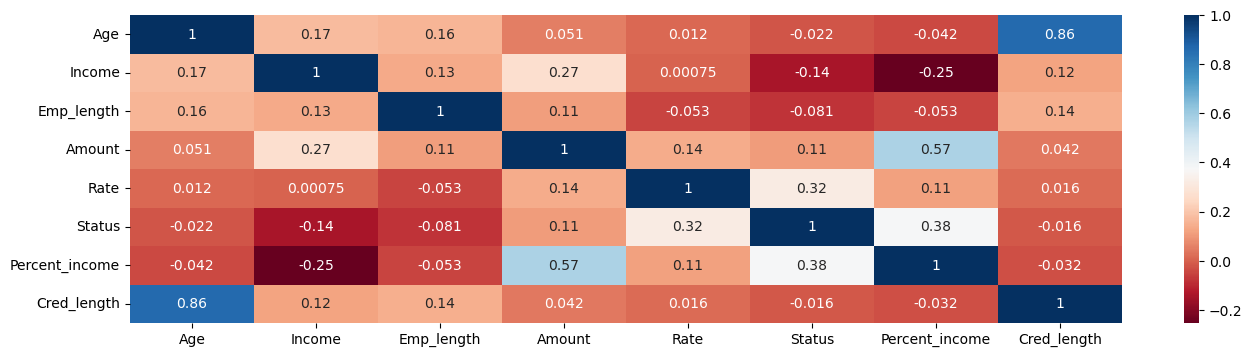

In [24]:
fig = plt.figure(figsize=(16, 4))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

# Finding and removing outliers:

<Figure size 1600x400 with 0 Axes>

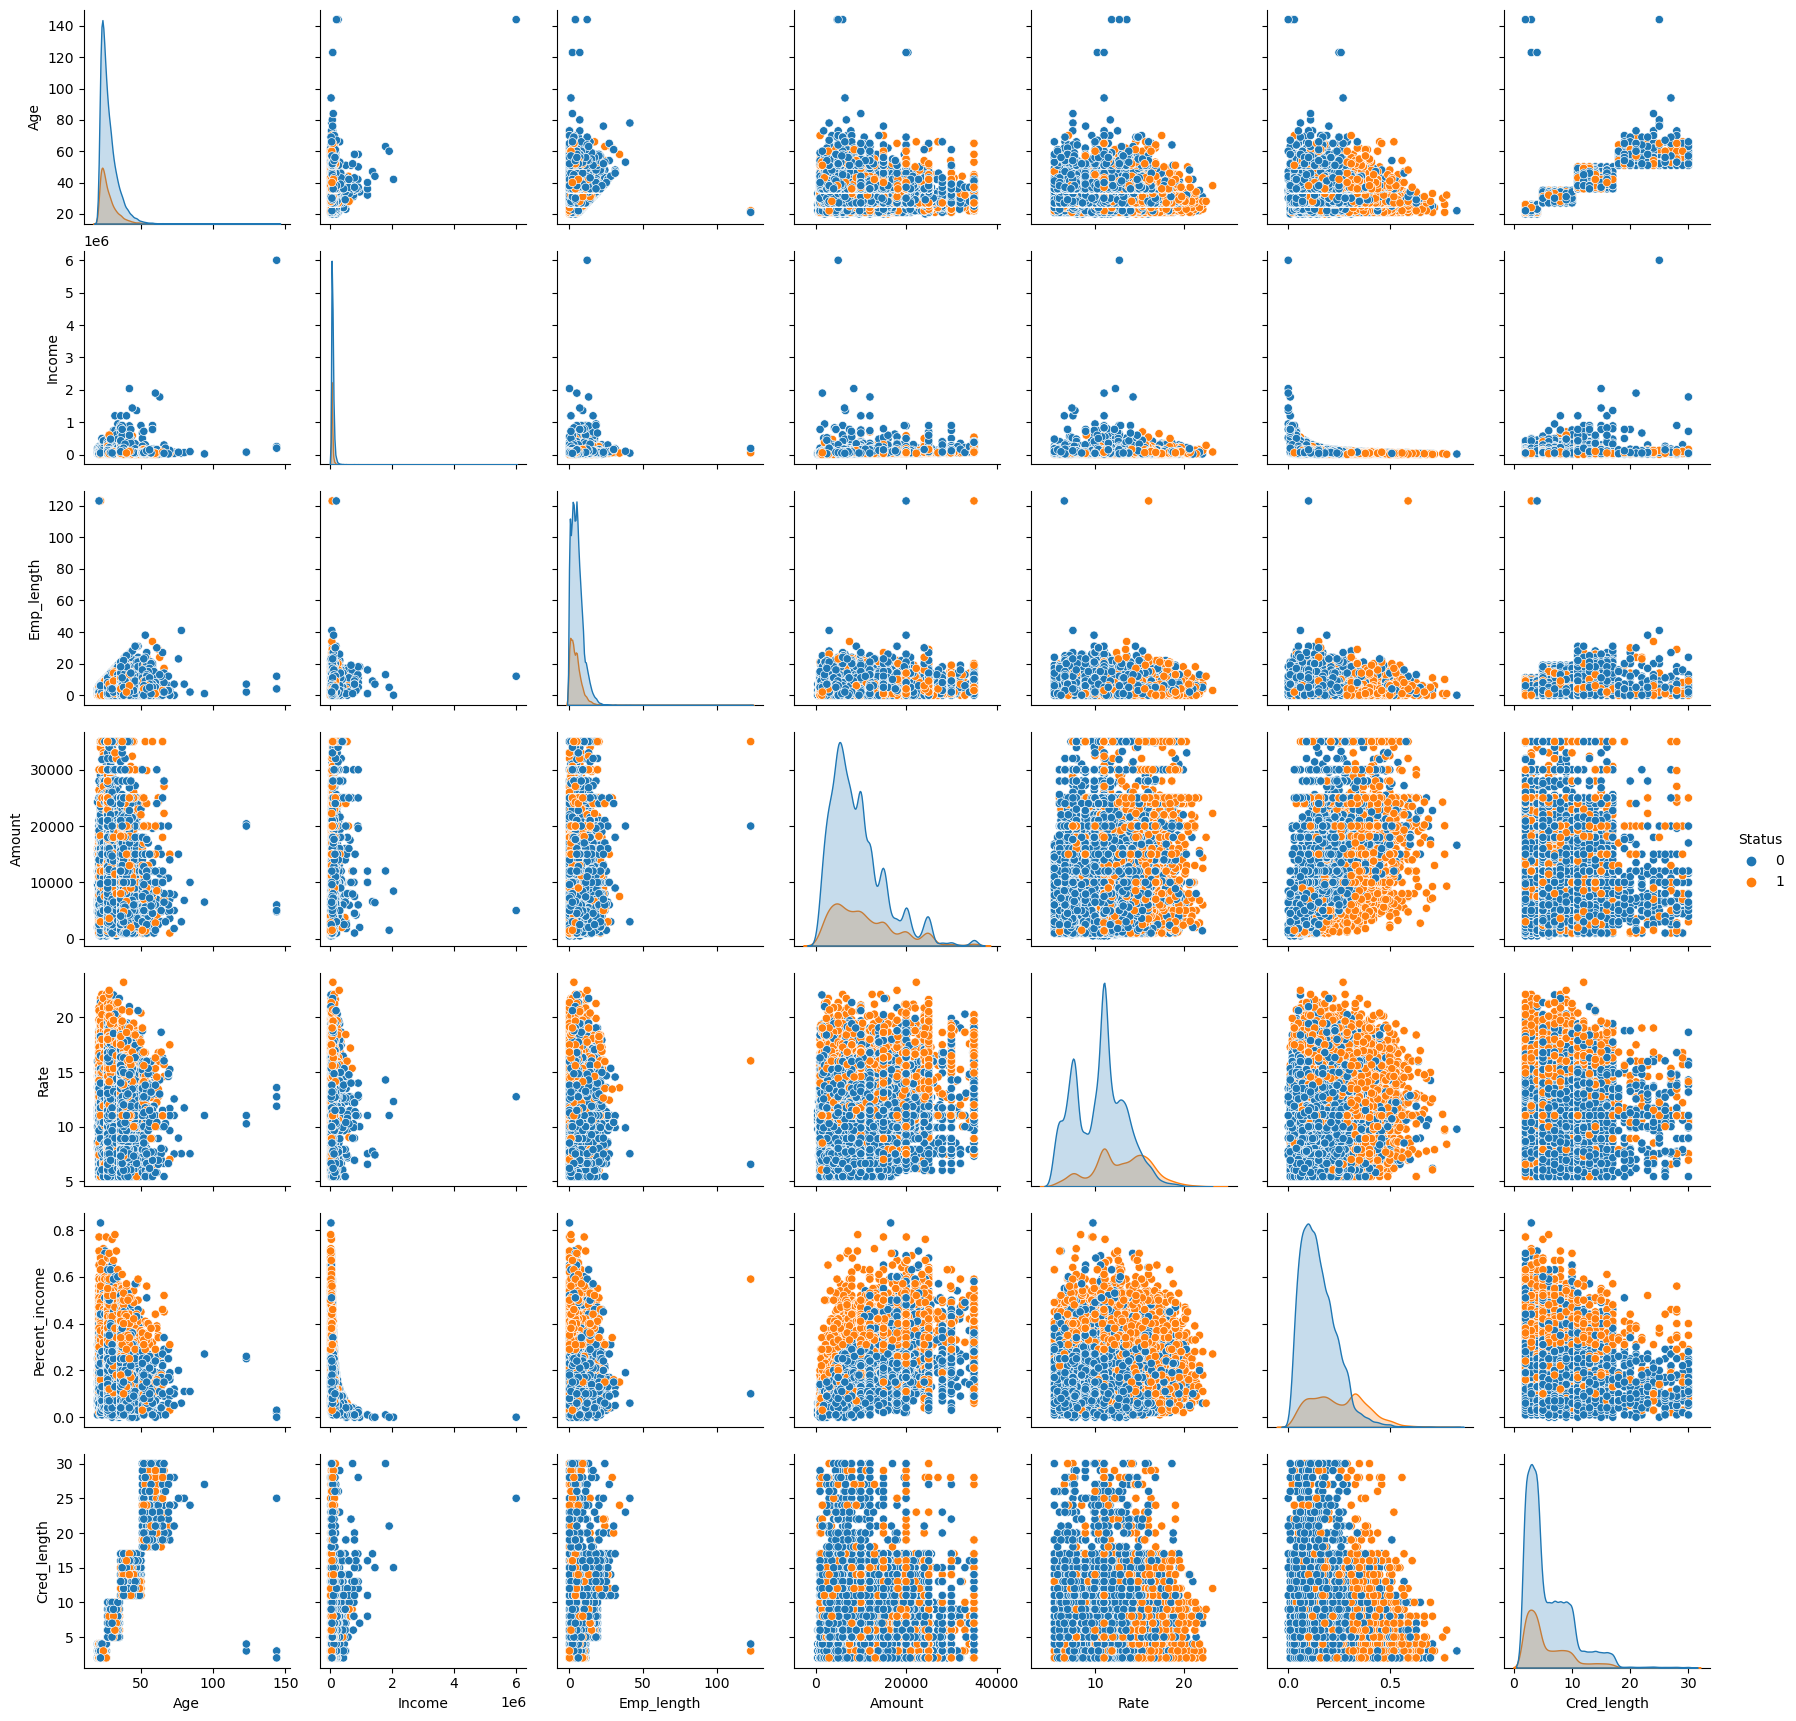

In [25]:
fig = plt.figure(figsize=(16, 4))
sns.pairplot(df, hue='Status', diag_kind='kde')

<Figure size 1600x400 with 0 Axes>

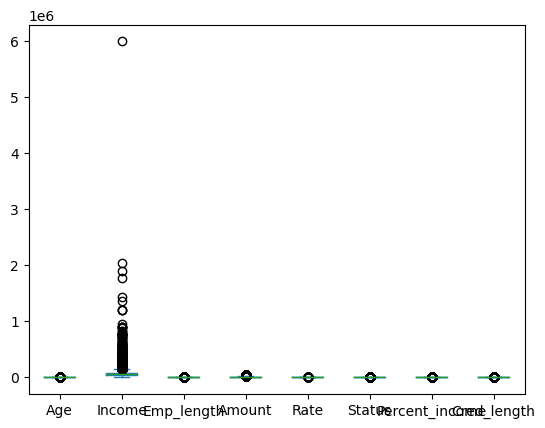

In [26]:
fig = plt.figure(figsize=(16, 4))
df.plot(kind='box')
plt.show()

In [27]:
num_ftrs = ['Age', 'Income', 'Amount', 'Rate', 'Percent_income', 'Cred_length']

for i in num_ftrs:
    print(f'Five box summary for {i}: ')
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    minimum = df[i].min()
    maximum = df[i].max()

    print(f'''

    Q1 score: {Q1},
    ---------------------
    Q3 score: {Q3},
    ---------------------
    IQR score: {IQR},
    ---------------------
    Lower Bound score: {lower_bound},
    ---------------------
    Upper Bound score: {upper_bound},
    ---------------------
    Minimum Score: {minimum},
    ---------------------
    Maximum Score: {maximum}
    
    ''')

Five box summary for Age: 


    Q1 score: 23.0,
    ---------------------
    Q3 score: 30.0,
    ---------------------
    IQR score: 7.0,
    ---------------------
    Lower Bound score: 12.5,
    ---------------------
    Upper Bound score: 40.5,
    ---------------------
    Minimum Score: 20,
    ---------------------
    Maximum Score: 144
    
    
Five box summary for Income: 


    Q1 score: 38500.0,
    ---------------------
    Q3 score: 79200.0,
    ---------------------
    IQR score: 40700.0,
    ---------------------
    Lower Bound score: -22550.0,
    ---------------------
    Upper Bound score: 140250.0,
    ---------------------
    Minimum Score: 4000,
    ---------------------
    Maximum Score: 6000000
    
    
Five box summary for Amount: 


    Q1 score: 5000.0,
    ---------------------
    Q3 score: 12200.0,
    ---------------------
    IQR score: 7200.0,
    ---------------------
    Lower Bound score: -5800.0,
    ---------------------
    Upper Bound sco

## Removing outliers from data:

In [28]:
outliers_income = (df['Income'] < -22550.0) | (df['Income'] > 140250.0)
outliers_amount = (df['Amount'] < -5800.0) | (df['Amount'] > 23000.0)
outliers_age = (df['Age'] < 12.5) | (df['Age'] > 80)
outliers_age = (df['Age'] < 12.5) | (df['Age'] > 80)
outliers_emp_length = (df['Emp_length'] < 0) | (df['Emp_length'] > 60)

df = df[~outliers_income]
df = df[~outliers_amount]
df = df[~outliers_age]
df = df[~outliers_emp_length]

C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\3308409660.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_amount]
C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\3308409660.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_age]
C:\Users\abdul\AppData\Local\Temp\ipykernel_16796\3308409660.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_emp_length]


<Figure size 1600x400 with 0 Axes>

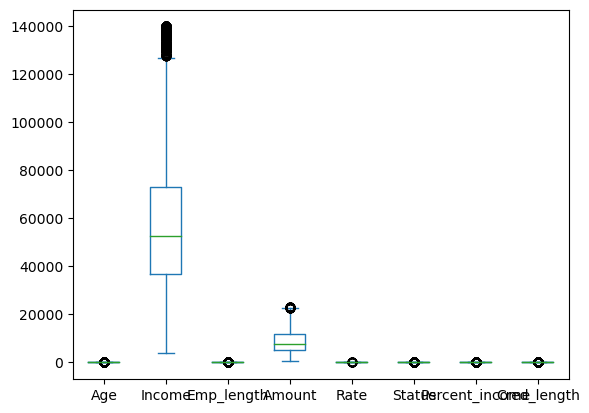

In [29]:
fig = plt.figure(figsize=(16, 4))
df.plot(kind='box')
plt.show()

## Analyzing data using histogram:

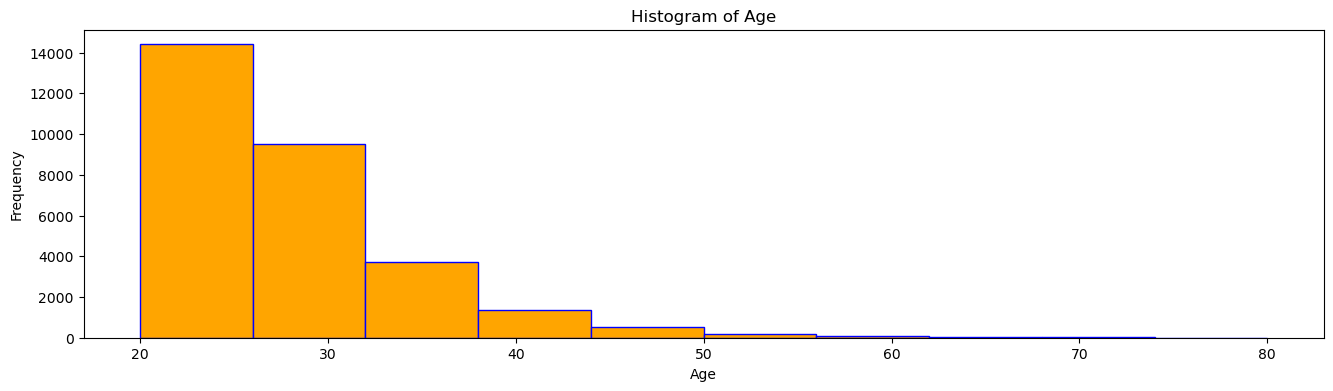

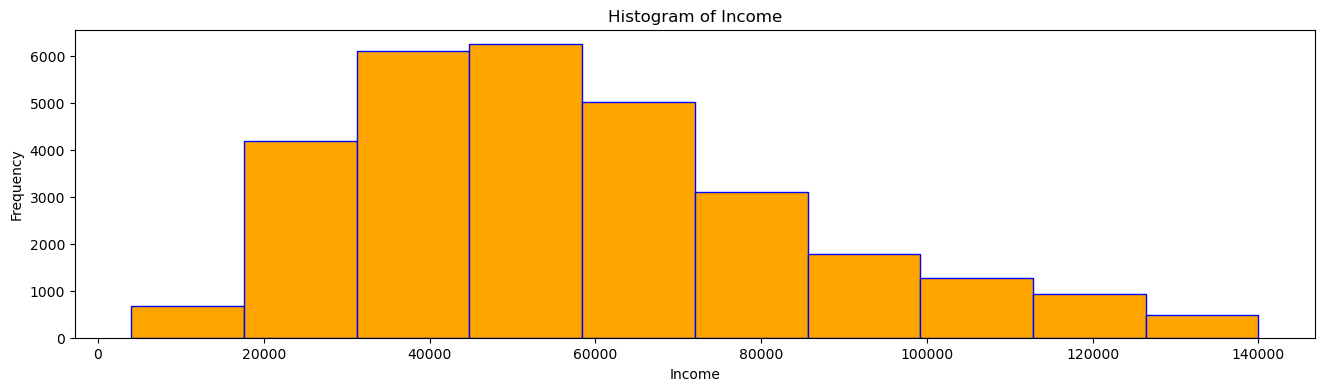

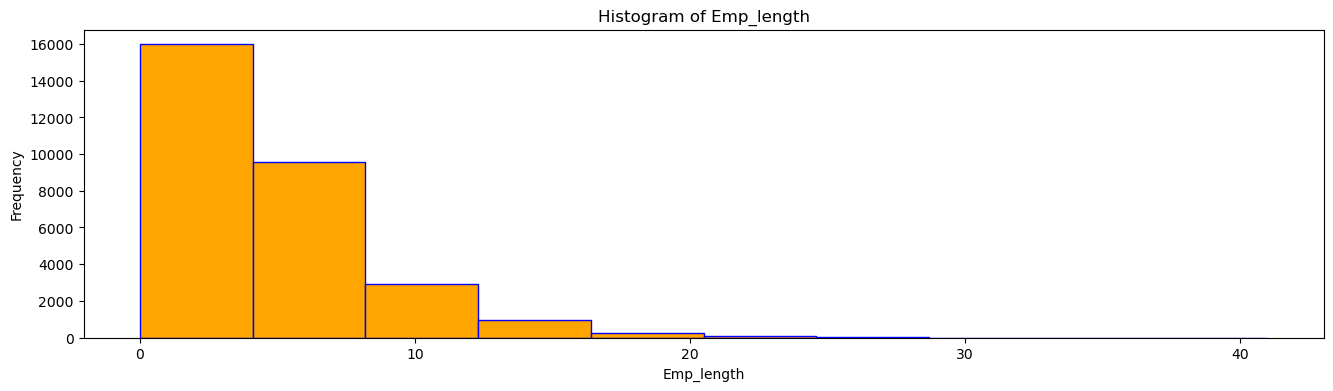

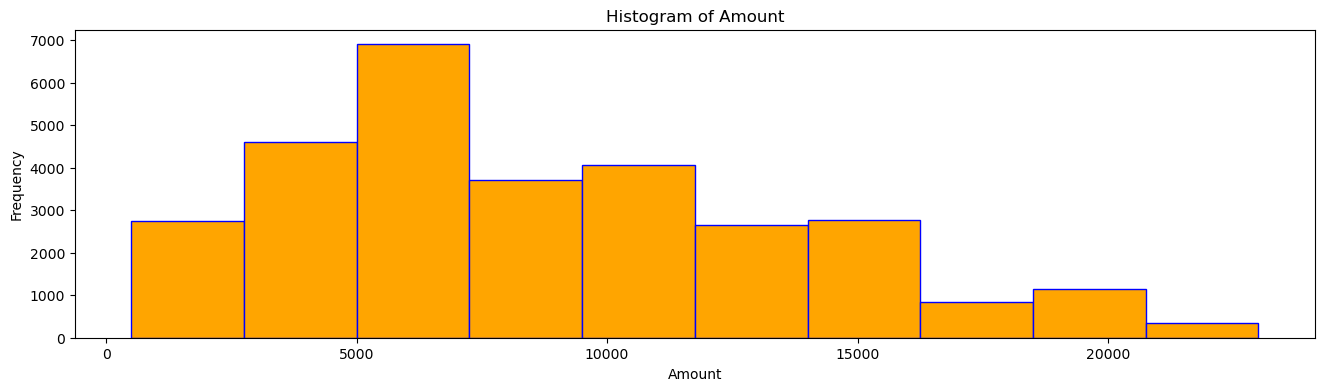

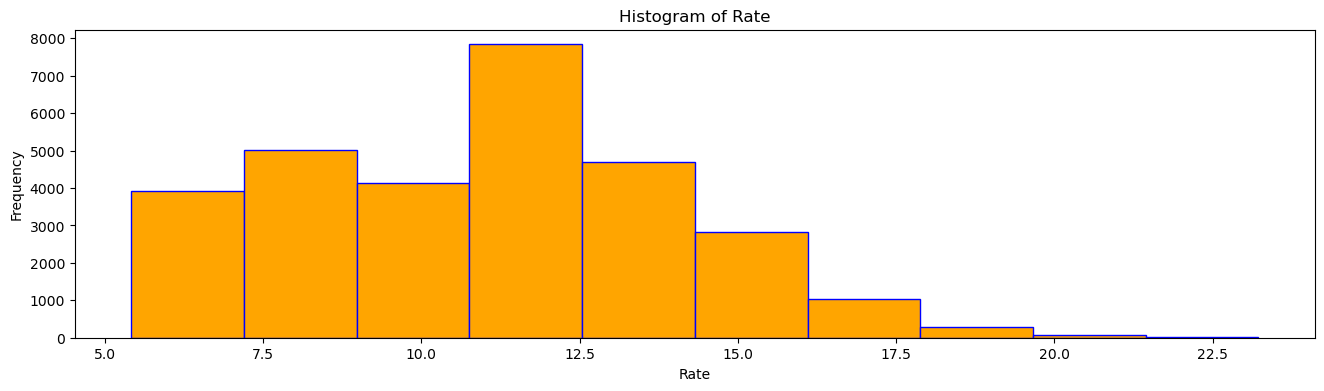

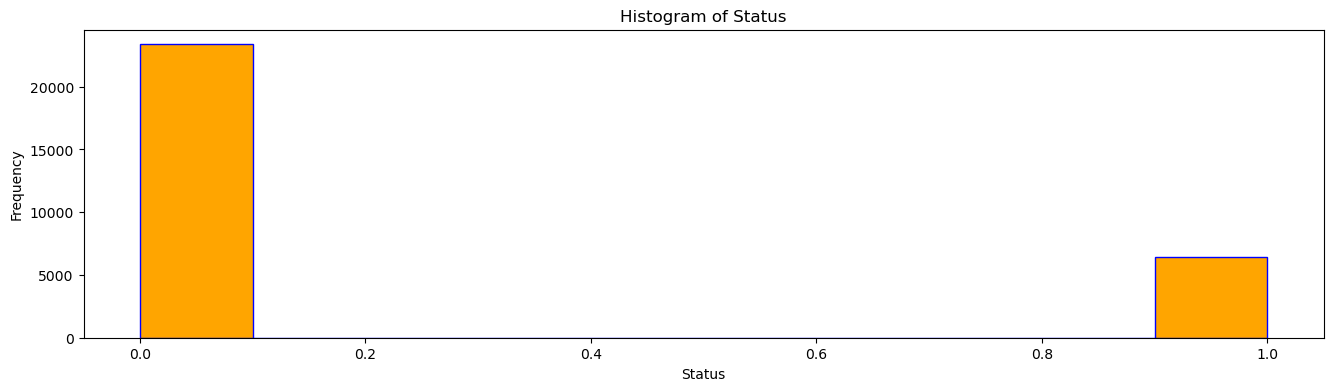

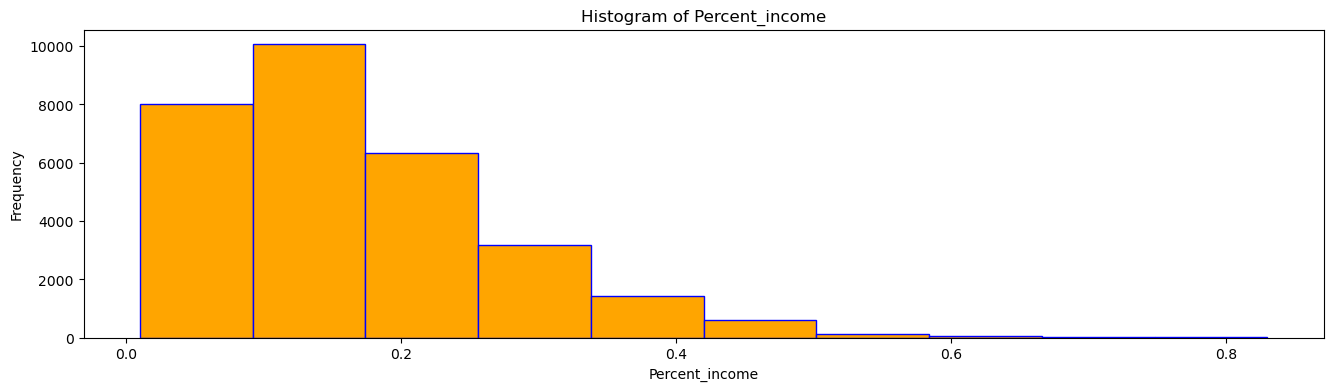

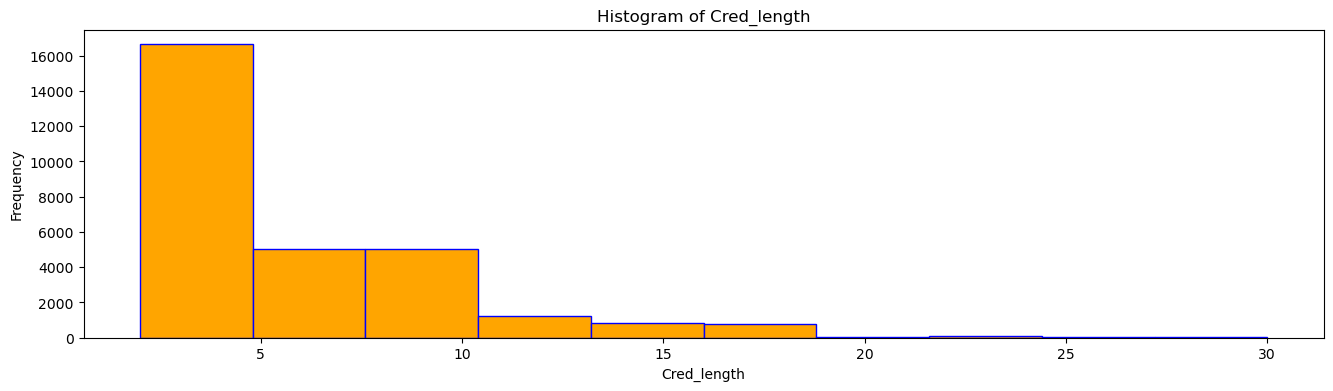

In [30]:
for column in df.columns:
    if df[column].dtypes != "object":
        plt.figure(figsize=(16, 4))
        plt.hist(df[column], bins=10, color='orange', edgecolor='blue')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title('Histogram of ' + column)
        plt.show()

**Age Distribution**: Predominantly, individuals within the age range of 20 to 25 applied for loans.

**Income Levels**: The majority of applicants reported a yearly income above than 10k and below than 100k.

**Employment Status**: A significant portion of applicants recently gained employment and sought loans within the range of 6k to 10k.

**Interest Rates and Approval Status**: Most applicants faced interest rates between 10% to 20%, with a noteworthy proportion experiencing disapproval.

**Credit Length and Credibility**: 

There is a prevalent trend indicating a shorter credit history among applicants, which potentially raises concerns regarding their creditworthiness and likelihood of default. However, it's imperative to acknowledge that the predominance of young applicants naturally corresponds with shorter credit histories. This dynamic underscores the importance of holistic assessment strategies when evaluating loan applications, taking into account demographic factors alongside traditional credit metrics to make informed lending decisions.

# Analyzing Categorical Features:

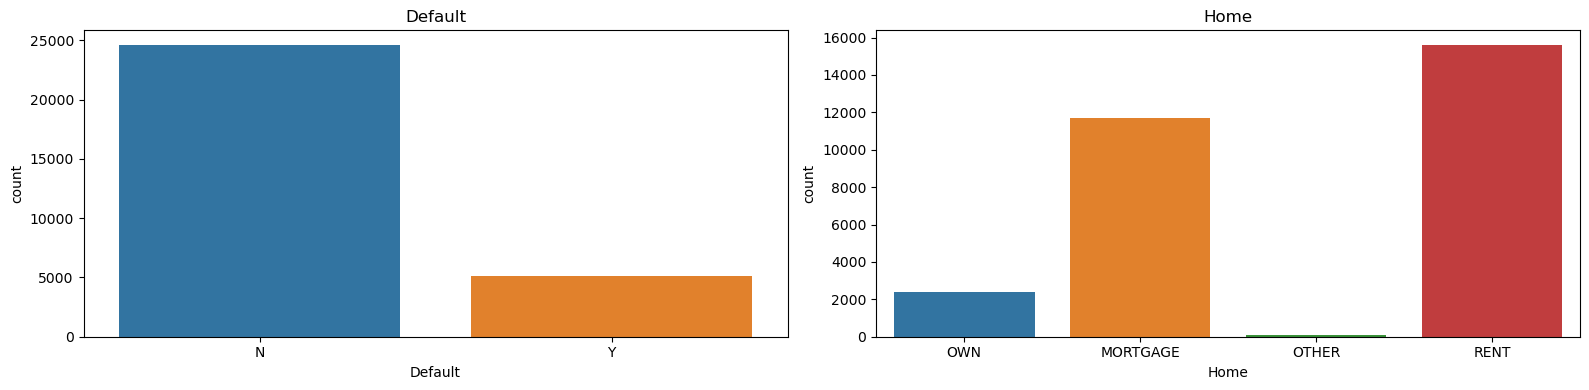

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Default', ax=axes[0])
sns.countplot(data=df, x='Home', ax=axes[1])
axes[0].set_title('Default')
axes[1].set_title('Home')
plt.tight_layout()
plt.show()

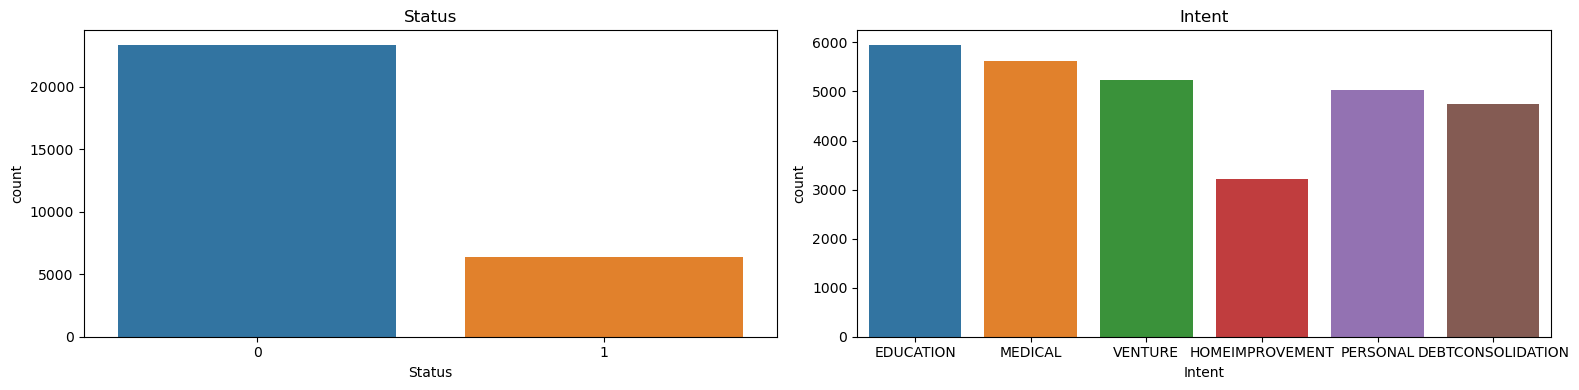

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=df, x='Status', ax=axes[0])
sns.countplot(data=df, x='Intent', ax=axes[1])
axes[0].set_title('Status')
axes[1].set_title('Intent')
plt.tight_layout()
plt.show()

# Analyzing Numeric Features using Each Type :

## Amount: 

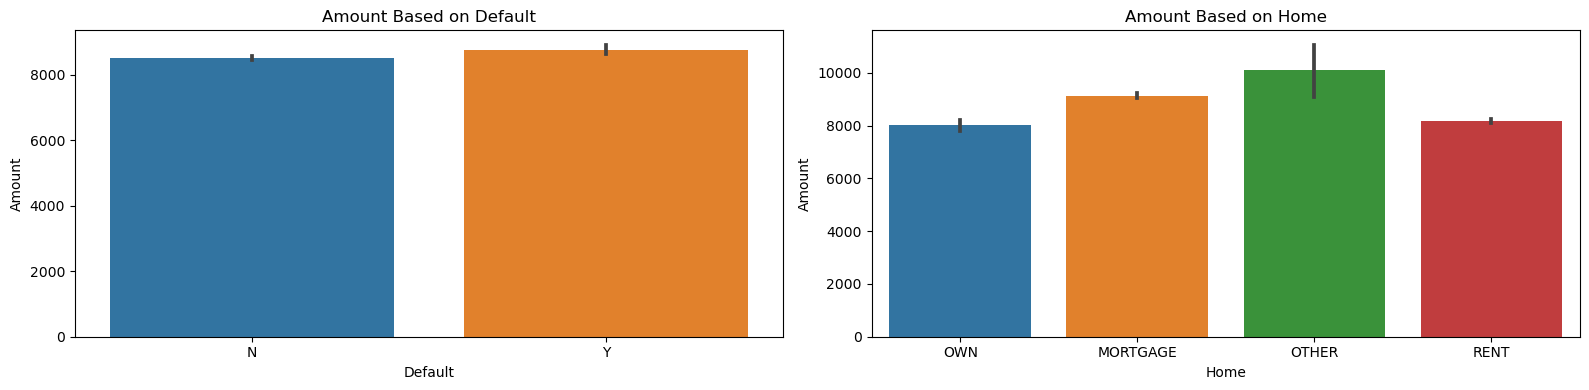

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Default', y='Amount', ax=axes[0])
sns.barplot(data=df, x='Home', y='Amount', ax=axes[1])
axes[0].set_title('Amount Based on Default')
axes[1].set_title('Amount Based on Home')
plt.tight_layout()
plt.show()

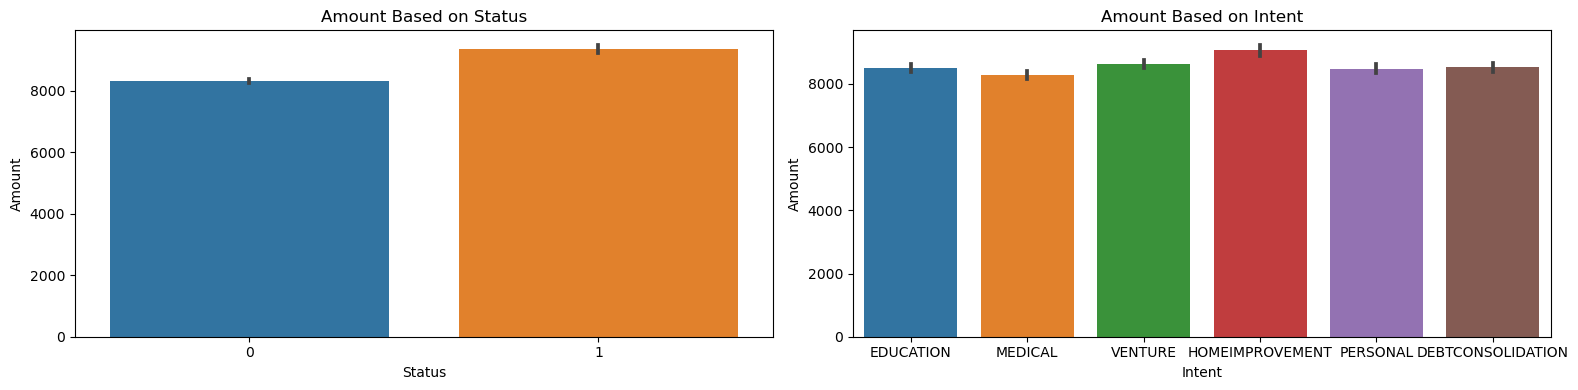

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Status', y='Amount', ax=axes[0])
sns.barplot(data=df, x='Intent', y='Amount', ax=axes[1])
axes[0].set_title('Amount Based on Status')
axes[1].set_title('Amount Based on Intent')
plt.tight_layout()
plt.show()

## Income:

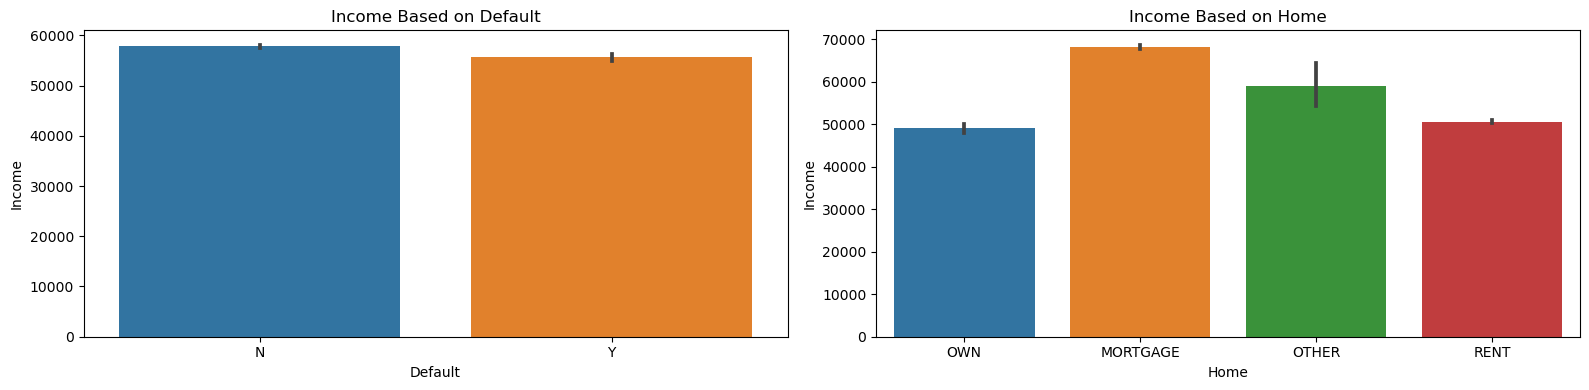

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Default', y='Income', ax=axes[0])
sns.barplot(data=df, x='Home', y='Income', ax=axes[1])
axes[0].set_title('Income Based on Default')
axes[1].set_title('Income Based on Home')
plt.tight_layout()
plt.show()

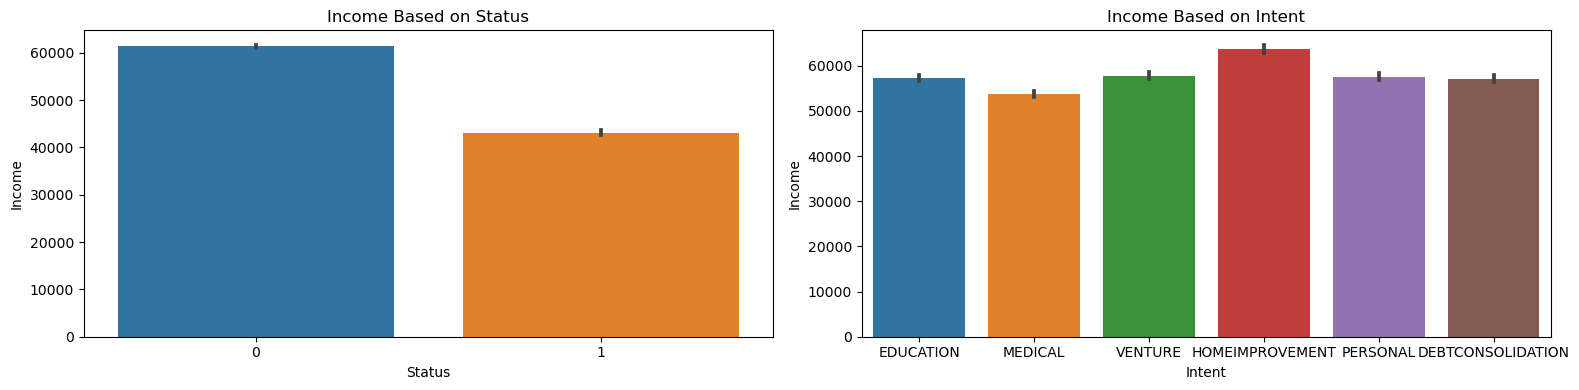

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Status', y='Income', ax=axes[0])
sns.barplot(data=df, x='Intent', y='Income', ax=axes[1])
axes[0].set_title('Income Based on Status')
axes[1].set_title('Income Based on Intent')
plt.tight_layout()
plt.show()

## Rate:

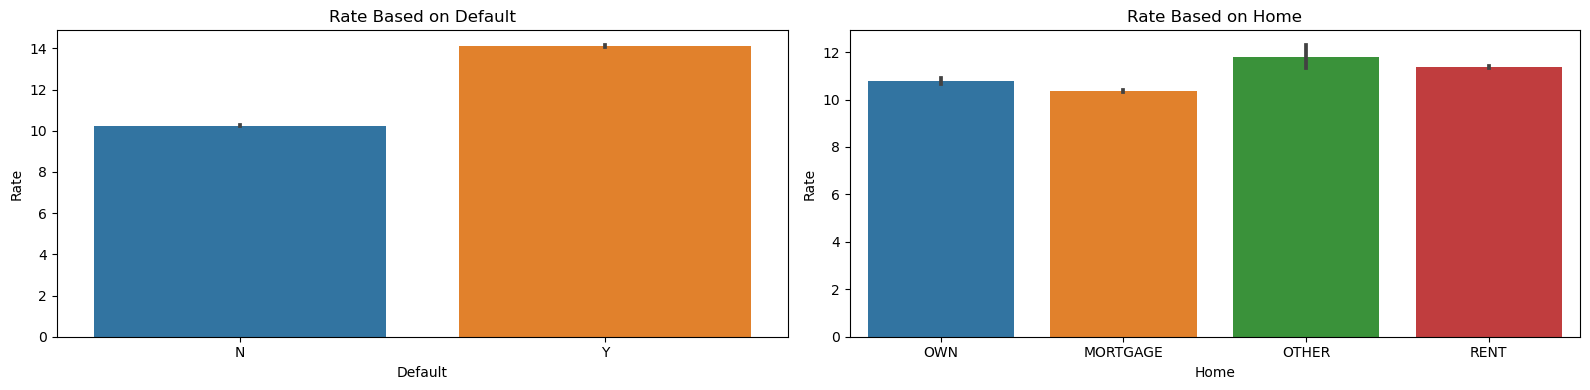

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Default', y='Rate', ax=axes[0])
sns.barplot(data=df, x='Home', y='Rate', ax=axes[1])
axes[0].set_title('Rate Based on Default')
axes[1].set_title('Rate Based on Home')
plt.tight_layout()
plt.show()

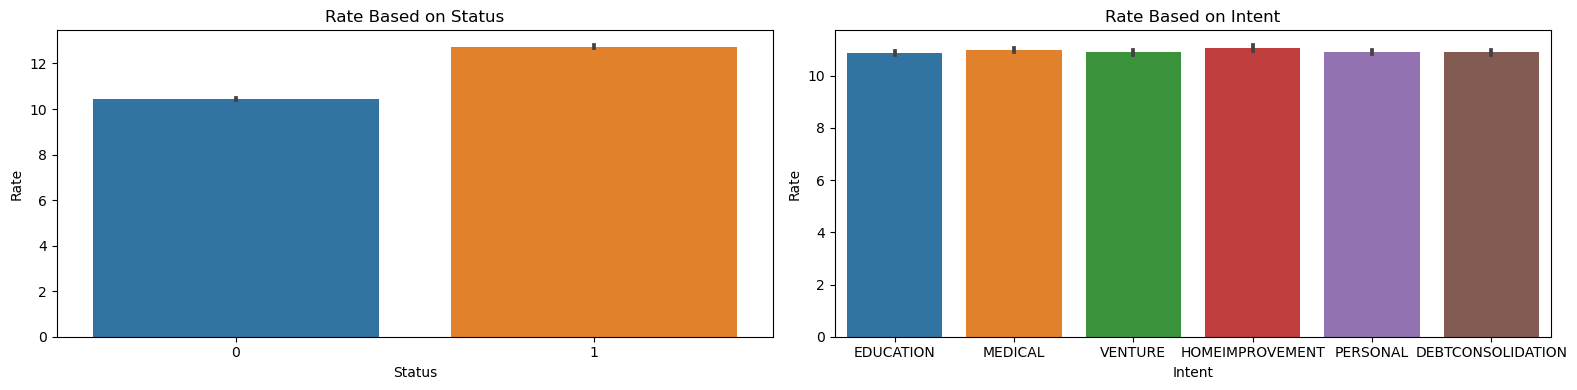

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=df, x='Status', y='Rate', ax=axes[0])
sns.barplot(data=df, x='Intent', y='Rate', ax=axes[1])
axes[0].set_title('Rate Based on Status')
axes[1].set_title('Rate Based on Intent')
plt.tight_layout()
plt.show()

# Machine Learning:

### One Hot Encoding:

In [39]:
from sklearn.preprocessing import LabelEncoder

ohe = LabelEncoder()

In [40]:
df_cat = df.select_dtypes(include=['object']).columns.tolist()

In [41]:
df[df_cat]

,Home,Intent,Default
1,OWN,EDUCATION,N
2,MORTGAGE,MEDICAL,N
5,OWN,VENTURE,N
9,OWN,VENTURE,N
11,OWN,HOMEIMPROVEMENT,N
...,...,...,...
32574,RENT,PERSONAL,Y
32575,RENT,EDUCATION,N
32576,MORTGAGE,PERSONAL,N
32577,MORTGAGE,PERSONAL,N


In [42]:
df.Home = ohe.fit_transform(df.Home)

df.Intent = ohe.fit_transform(df.Intent)

df.Default = ohe.fit_transform(df.Default)

df.Status = ohe.fit_transform(df.Status)

In [43]:
df

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
5,21,9900,2,2.0,5,2500,7.14,1,0.25,0,2
9,21,10000,2,6.0,5,1600,14.74,1,0.16,0,3
11,21,10000,2,2.0,2,4500,8.63,1,0.45,0,2
...,...,...,...,...,...,...,...,...,...,...,...
32574,52,65004,3,4.0,4,20000,15.58,1,0.31,1,19
32575,52,64500,3,0.0,1,5000,11.26,0,0.08,0,20
32576,57,53000,0,1.0,4,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,17625,7.49,0,0.15,0,19


In [44]:
df.query('Home > 1 and Status == 1 and Default == 1')

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
72,21,12000,2,6.000000,1,3000,13.610000,1,0.25,1,3
77,21,12000,2,0.000000,4,4200,13.480000,1,0.35,1,4
109,25,12816,2,0.000000,0,3000,12.870000,1,0.23,1,4
116,23,12996,2,0.000000,0,2400,13.490000,1,0.18,1,2
303,21,15000,2,0.000000,2,3175,11.540000,1,0.21,1,3
...,...,...,...,...,...,...,...,...,...,...,...
32471,53,54000,3,4.789686,3,10000,14.590000,1,0.19,1,27
32473,64,56000,3,0.000000,0,10000,16.820000,1,0.18,1,18
32547,53,4888,2,0.000000,5,1400,11.011695,1,0.29,1,28
32563,52,71520,3,0.000000,1,7000,16.820000,1,0.10,1,24


In [45]:
df.to_csv('credit_risk_encoded.csv', index=False)

## Splitting data for training & testing:

In [46]:
X = df.drop(['Status'], axis=1)
y = df.Status

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

In [49]:
x_train.head(5)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length
25847,34,90636,0,4.0,1,17000,13.850000,0.19,1,5
23606,30,65000,0,3.0,5,20000,16.770000,0.31,1,6
30673,36,60996,0,8.0,0,15000,9.630000,0.25,0,14
32006,44,60000,0,4.0,2,15000,11.011695,0.25,0,11
4419,23,40104,1,7.0,1,10000,12.720000,0.25,1,2


# Loading Various Classification Models:

Since, it's a classification-based Supervised Learning.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
dtree = DecisionTreeClassifier()
rftree = RandomForestClassifier()
lr = LogisticRegression()
nb = MultinomialNB()
gb = GradientBoostingClassifier()

## Training the Models:

In [52]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
rftree.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
lr.fit(x_train, y_train)

LogisticRegression()

In [55]:
nb.fit(x_train, y_train)

MultinomialNB()

In [56]:
gb.fit(x_train, y_train)

GradientBoostingClassifier()

## Making Predictions and Evaluating the Models:

In [57]:
y_pred_dTree = dtree.predict(x_test)
y_pred_rftree = rftree.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_gb = gb.predict(x_test)

## Accuracy score:

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
print(f'Accuracy score for Decicion Tree: {accuracy_score(y_test, y_pred_dTree)}')
print(f'Accuracy score for Random Forest Tree: {accuracy_score(y_test, y_pred_rftree)}')
print(f'Accuracy score for Logistic Regression Tree: {accuracy_score(y_test, y_pred_lr)}')
print(f'Accuracy score for Naive Bayes: {accuracy_score(y_test, y_pred_nb)}')
print(f'Accuracy score for Gradient Boosting: {accuracy_score(y_test, y_pred_gb)}')

Accuracy score for Decicion Tree: 0.8685376661742984
Accuracy score for Random Forest Tree: 0.9190277964280918
Accuracy score for Logistic Regression Tree: 0.8098563179803948
Accuracy score for Naive Bayes: 0.6637572176715456
Accuracy score for Gradient Boosting: 0.910970860749295


In [60]:
accuracy_scores = [
    {'Model': 'Decision Tree', 'Accuracy Score': accuracy_score(y_test, y_pred_dTree)},
    {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test, y_pred_rftree)},
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, y_pred_lr)},
    {'Model': 'Naive Bayes', 'Accuracy Score': accuracy_score(y_test, y_pred_nb)},
    {'Model': 'Gradient Boosting', 'Accuracy Score': accuracy_score(y_test, y_pred_gb)}
]

accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)
accuracy_df.head()

,Model,Accuracy Score
1,Random Forest,0.919028
4,Gradient Boosting,0.910971
0,Decision Tree,0.868538
2,Logistic Regression,0.809856
3,Naive Bayes,0.663757


<AxesSubplot:xlabel='Accuracy Score', ylabel='Model'>

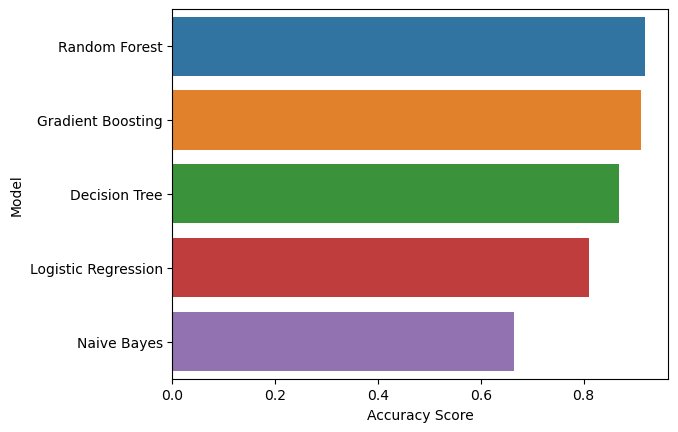

In [61]:
sns.barplot(data=accuracy_df, x='Accuracy Score', y='Model')

### Saving our Random forest Model:

In [62]:
import pickle

In [63]:
with open('model.pkl','wb') as model:
    pickle.dump(rftree, model)

### Due to the highest accuracy score, we will prefer random forest model for our future predictions.

In [64]:
#!pip install ipywidget if not installed in your environment.
import ipywidgets as widgets
from IPython.display import display

model_dropdown = widgets.Dropdown(
    options=accuracy_df['Model'],
    description='Select Model: ',
    disabled=False,
)

model_dropdown

Dropdown(description='Select Model: ', options=('Random Forest', 'Gradient Boosting', 'Decision Tree', 'Logist…

In [65]:
def get_model(model_name):
    if model_name == 'Decision Tree':
        return dtree
    elif model_name == 'Random Forest':
        return rftree
    elif model_name == 'Logistic Regression':
        return lr
    elif model_name == 'Naive Bayes':
        return nb
    else:
        return gb

In [66]:
print('Data: ')
print(x_test.iloc[454].values)

Data: 
[2.400e+01 3.600e+04 0.000e+00 8.000e+00 4.000e+00 3.500e+03 1.306e+01
 1.000e-01 1.000e+00 3.000e+00]


In [67]:
print('Actual Value: ')
print(y_test.iloc[454])

Actual Value: 
0


In [68]:
print(f'Predicting Value using {model_dropdown.value}: ')
get_model(model_dropdown.value).predict([x_test.iloc[454].values])

Predicting Value using Random Forest: 


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [69]:
# Done